In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow

In [134]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)

In [152]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [153]:
df.info() # Basic Information
print("\nShape: ",df.shape) # Shape of data
print("\nChecking for missing values")
df.isnull().sum()# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   9613 non-null   int64 
 1   review      9613 non-null   object
 2   Unnamed: 2  333 non-null    object
 3   Unnamed: 3  137 non-null    object
 4   Unnamed: 4  37 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
dtypes: int64(1), object(6)
memory usage: 525.8+ KB

Shape:  (9613, 7)

Checking for missing values


sentiment        0
review           0
Unnamed: 2    9280
Unnamed: 3    9476
Unnamed: 4    9576
Unnamed: 5    9608
Unnamed: 6    9611
dtype: int64

In [154]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [155]:
#Dropping unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)

In [156]:
df.to_csv('mr/sst2.csv', index=False)

In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-sst2.csv', index=False)
test.to_csv('mr/test-sst2.csv', index=False)

In [5]:
train_df = pd.read_csv("mr/train-sst2.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,0,feels more like a rejected x-files episode tha...
1,0,with spy kids 2 : the island of lost dreams wr...
2,1,"while the story 's undeniably hard to follow ,..."
3,1,"not only is undercover brother as funny , if n..."
4,0,dignified ceo 's meet at a rustic retreat and ...
...,...,...
8647,1,a superbly acted and funny\/gritty fable of th...
8648,0,we miss the quirky amazement that used to come...
8649,0,a benign but forgettable sci-fi diversion .
8650,1,elvira fans could hardly ask for more .


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_12436\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'feels more like a rejected x-files episode than a credible account of a puzzling real-life happening .'

In [8]:
test_df = pd.read_csv("mr/test-sst2.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(961, 2)

In [10]:
test_df.head()

,sentiment,review
0,1,although german cooking does not come readily ...
1,1,"a very well-made , funny and entertaining pict..."
2,0,coughs and sputters on its own postmodern conc...
3,0,the movie is dawn of the dead crossed with joh...
4,0,this is the sort of burly action flick where o...


In [11]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,0,feels more like a rejected x-files episode tha...
1,0,with spy kids 2 : the island of lost dreams wr...
2,1,"while the story 's undeniably hard to follow ,..."
3,1,"not only is undercover brother as funny , if n..."
4,0,dignified ceo 's meet at a rustic retreat and ...
5,0,even if it made its original release date last...
6,1,a fascinating glimpse into an insular world th...
7,1,far more imaginative and ambitious than the tr...
8,0,-lrb- a -rrb- poorly executed comedy .
9,1,griffiths proves she 's that rare luminary who...


In [12]:
test_df.head()

,sentiment,review
0,1,although german cooking does not come readily ...
1,1,"a very well-made , funny and entertaining pict..."
2,0,coughs and sputters on its own postmodern conc...
3,0,the movie is dawn of the dead crossed with joh...
4,0,this is the sort of burly action flick where o...


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,feels more like a rejected x-files episode tha...
1,1,0,with spy kids 2 : the island of lost dreams wr...
2,2,1,"while the story 's undeniably hard to follow ,..."
3,3,1,"not only is undercover brother as funny , if n..."
4,4,0,dignified ceo 's meet at a rustic retreat and ...


In [14]:
train_df_bert

,id,label,sentence
0,0,0,feels more like a rejected x-files episode tha...
1,1,0,with spy kids 2 : the island of lost dreams wr...
2,2,1,"while the story 's undeniably hard to follow ,..."
3,3,1,"not only is undercover brother as funny , if n..."
4,4,0,dignified ceo 's meet at a rustic retreat and ...
...,...,...,...
8647,8647,1,a superbly acted and funny\/gritty fable of th...
8648,8648,0,we miss the quirky amazement that used to come...
8649,8649,0,a benign but forgettable sci-fi diversion .
8650,8650,1,elvira fans could hardly ask for more .


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,0,feels more like a rejected x-files episode tha...
1,1,0,with spy kids 2 : the island of lost dreams wr...
2,2,1,"while the story 's undeniably hard to follow ,..."
3,3,1,"not only is undercover brother as funny , if n..."
4,4,0,dignified ceo 's meet at a rustic retreat and ...
...,...,...,...
8647,8647,1,a superbly acted and funny\/gritty fable of th...
8648,8648,0,we miss the quirky amazement that used to come...
8649,8649,0,a benign but forgettable sci-fi diversion .
8650,8650,1,elvira fans could hardly ask for more .


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,although german cooking does not come readily ...
1,1,1,"a very well-made , funny and entertaining pict..."
2,2,0,coughs and sputters on its own postmodern conc...
3,3,0,the movie is dawn of the dead crossed with joh...
4,4,0,this is the sort of burly action flick where o...


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,1,although german cooking does not come readily ...
1,1,1,"a very well-made , funny and entertaining pict..."
2,2,0,coughs and sputters on its own postmodern conc...
3,3,0,the movie is dawn of the dead crossed with joh...
4,4,0,this is the sort of burly action flick where o...
...,...,...,...
956,956,0,"its mysteries are transparently obvious , and ..."
957,957,1,a sensitive and expertly acted crowd-pleaser t...
958,958,0,"... too slow , too boring , and occasionally a..."
959,959,0,this is pretty dicey material .


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  with spy kids 2 : the island of lost dreams writer\/director\/producer robert rodriguez has cobbled together a film that feels like a sugar high gone awry .
Tokenized:  ['with', 'spy', 'kids', '2', ':', 'the', 'island', 'of', 'lost', 'dreams', 'writer', '\\', '/', 'director', '\\', '/', 'producer', 'robert', 'rodriguez', 'has', 'cobb', '##led', 'together', 'a', 'film', 'that', 'feels', 'like', 'a', 'sugar', 'high', 'gone', 'aw', '##ry', '.']
Token IDs:  [2007, 8645, 4268, 1016, 1024, 1996, 2479, 1997, 2439, 5544, 3213, 1032, 1013, 2472, 1032, 1013, 3135, 2728, 9172, 2038, 17176, 3709, 2362, 1037, 2143, 2008, 5683, 2066, 1037, 5699, 2152, 2908, 22091, 2854, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  78


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  63


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  feels more like a rejected x-files episode than a credible account of a puzzling real-life happening .
Token IDs: tensor([  101,  5683,  2062,  2066,  1037,  5837,  1060,  1011,  6764,  2792,
         2084,  1037, 23411,  4070,  1997,  1037, 16405, 20838,  2613,  1011,
         2166,  6230,  1012,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [27]:

train_df_bert.head()

,id,label,sentence
0,0,0,feels more like a rejected x-files episode tha...
1,1,0,with spy kids 2 : the island of lost dreams wr...
2,2,1,"while the story 's undeniably hard to follow ,..."
3,3,1,"not only is undercover brother as funny , if n..."
4,4,0,dignified ceo 's meet at a rustic retreat and ...


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (8652, 60)
X_test shape: (961, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [33]:
#FuzzyCNNLSTM
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim

#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 60)                15120     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
fuzzy_layer (FuzzyLayer)     (None, 20)                2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
defuzzy_layer (DefuzzyLayer) (None, 10)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)  

In [34]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
779/779 [==============================] - 19s 17ms/step - loss: 0.6800 - accuracy: 0.5378 - val_loss: 0.6579 - val_accuracy: 0.6455
Epoch 2/20
779/779 [==============================] - 12s 16ms/step - loss: 0.5263 - accuracy: 0.7695 - val_loss: 0.5155 - val_accuracy: 0.7506
Epoch 3/20
779/779 [==============================] - 12s 15ms/step - loss: 0.4073 - accuracy: 0.8270 - val_loss: 0.5169 - val_accuracy: 0.7667
Epoch 4/20
779/779 [==============================] - 12s 15ms/step - loss: 0.3496 - accuracy: 0.8592 - val_loss: 0.5107 - val_accuracy: 0.7691
Epoch 5/20
779/779 [==============================] - 12s 15ms/step - loss: 0.3098 - accuracy: 0.8777 - val_loss: 0.5252 - val_accuracy: 0.7806
Epoch 6/20
779/779 [==============================] - 11s 15ms/step - loss: 0.2701 - accuracy: 0.8910 - val_loss: 0.5361 - val_accuracy: 0.7887
Epoch 7/20
271/271 [==============================] - 8s 29ms/step - loss: 0.2248 - accuracy: 0.9187
Training Accuracy: 0.918747
Trainin

In [35]:
#FuzzyCNNLSTM
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim

#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60)                15120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
fuzzy_layer_1 (FuzzyLayer)   (None, 20)                2400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
defuzzy_layer_1 (DefuzzyLaye (None, 10)                200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)

In [36]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
779/779 [==============================] - 28s 31ms/step - loss: 0.6924 - accuracy: 0.5122 - val_loss: 0.6915 - val_accuracy: 0.5208
Epoch 2/20
779/779 [==============================] - 24s 30ms/step - loss: 0.6570 - accuracy: 0.5819 - val_loss: 0.5954 - val_accuracy: 0.7194
Epoch 3/20
779/779 [==============================] - 24s 30ms/step - loss: 0.5288 - accuracy: 0.7692 - val_loss: 0.5605 - val_accuracy: 0.7356
Epoch 4/20
779/779 [==============================] - 24s 30ms/step - loss: 0.4102 - accuracy: 0.8199 - val_loss: 0.5250 - val_accuracy: 0.7471
Epoch 5/20
779/779 [==============================] - 23s 30ms/step - loss: 0.3515 - accuracy: 0.8542 - val_loss: 0.5029 - val_accuracy: 0.7517
Epoch 6/20
779/779 [==============================] - 24s 30ms/step - loss: 0.3059 - accuracy: 0.8741 - val_loss: 0.5453 - val_accuracy: 0.7633
Epoch 7/20
779/779 [==============================] - 24s 31ms/step - loss: 0.2698 - accuracy: 0.8926 - val_loss: 0.5926 - val_accuracy:

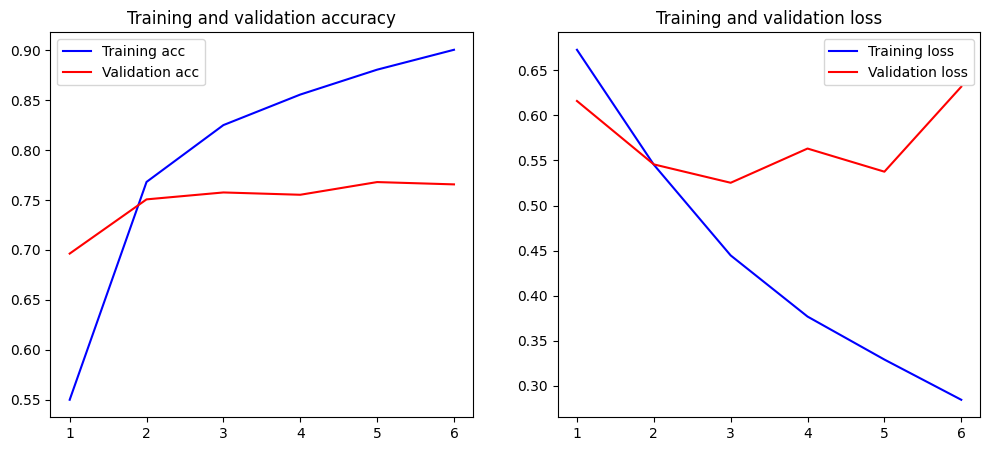

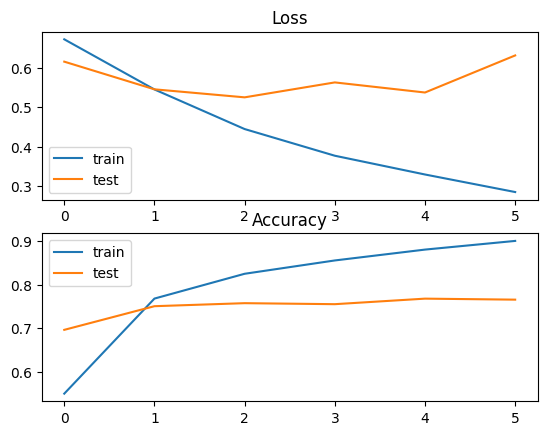

In [42]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

In [227]:
# number of neurons as number of Rule will be produce
n_neurons = 100

# number of features feed to fuzzy Inference Layer
n_feature = 9
from itertools import product
from keras import backend as K
import random
# to get all permutaion
fRules = list(product([-1.0,0.0,1.0], repeat=n_feature)) 

# based on article just 100 of them are needed
out_fRules = random.sample(fRules, n_neurons)

fRules_sigma = K.transpose(out_fRules)

In [228]:
import tensorflow as tf
class fuzzy_inference_block(tf.keras.layers.Layer):
    def __init__(self, output_dim, i_fmap, mu, sigma):

        self.output_dim = output_dim
        self.index = i_fmap
        self.mu = mu
        self.sigma = sigma

        super(fuzzy_inference_block, self).__init__()

    def build(self, input_shape):
        self.mu_map = fRules_sigma * self.mu
        self.sigma_map = tf.ones((n_feature, self.output_dim)) * self.sigma
        

        super().build(input_shape)

    def call(self, inputs):
        fMap = inputs[:,n_feature*(self.index):n_feature*(self.index+1)]
        # create variables for processing
        aligned_x = K.repeat_elements(K.expand_dims(fMap, axis=-1), self.output_dim, -1)
        aligned_c = self.mu_map
        aligned_s = self.sigma_map


        # calculate output of each neuron (fuzzy rule)
        phi = K.exp(-K.sum(K.square(aligned_x - aligned_c) / (2 * K.square(aligned_s)),
                           axis=-2, keepdims=False))
        return phi


In [239]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)


fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(fMaps)
fuzzy_inference = []
for i in tqdm(range(n_femap)):
    f_block = fuzzy_inference_block(output_dim=n_neurons, i_fmap=i, mu=mu, sigma=sigma)(drop_out)
    fuzzy_inference.append(f_block)
merged = concatenate(fuzzy_inference, axis=1)

dc=Dense(1,activation='sigmoid')(merged)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.50it/s]

Bi-LSTM NetWork
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_95 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 embedding_96 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 dropout_125 (Dropout)          (None, 60, 32)       0           ['embedding_95[0][0]']           
                                                                           

In [240]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 0.0000e+00 - accuracy: 0.6497 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accura

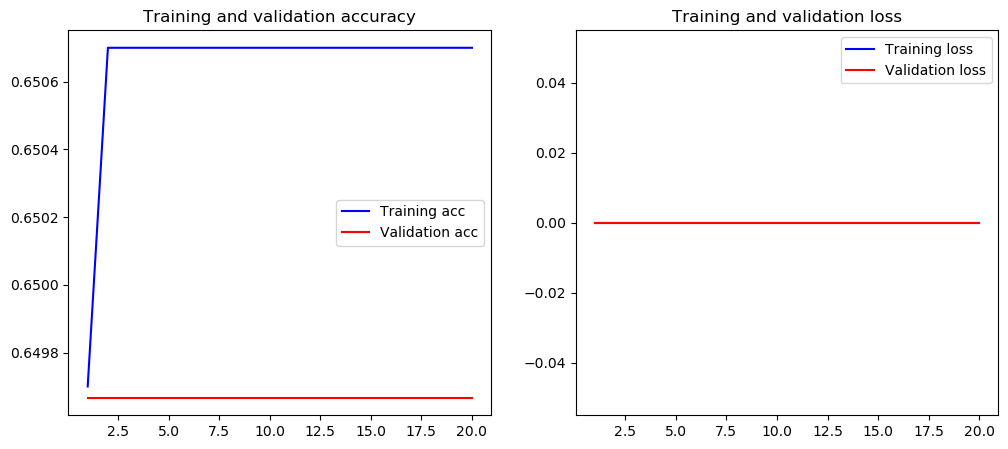

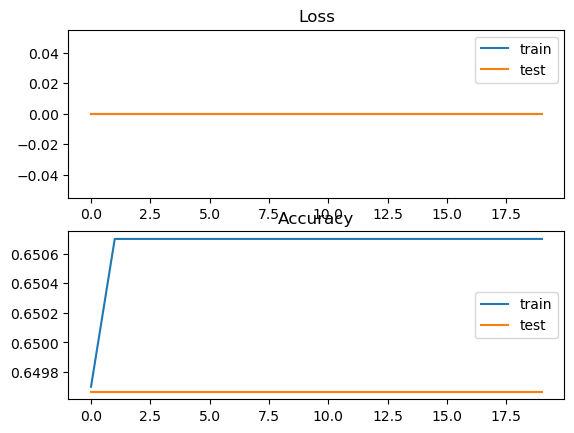

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [253]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)

#fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(bi_lstm)

dc=Dense(1,activation='sigmoid')(drop_out)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

Bi-LSTM NetWork
Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_108 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 embedding_109 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 dropout_143 (Dropout)          (None, 60, 32)       0           ['embedding_108[0][0]']          
                                                                           

In [254]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.6508 - val_loss: nan - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 8/20
313/313 [=====================

In [ ]:
from utils import *
import numpy as np
import random as rn
import tensorflow as tf
np.random.seed(42)
rn.seed(554521)
tf.set_random_seed(14452)
from keras.models import Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Activation, Input, Average
from keras.models import load_model
from sklearn.metrics import classification_report
import matplotlib as plt

RUN_ENSAMBLE = True
MODEL_SAVE_FOLDER = "models"

def model_1():
    model = Sequential(name="MODEL1")
    model.add(Dense(18, activation = 'sigmoid', input_shape=(28,)))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mae','acc'])
    return model

def model_2(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(27, activation = 'relu')(input)
    #x = Dense(7, activation = 'sigmoid')(x)
    x = Dropout(0.1)(x)
    output = Dense(output, activation = 'softmax')(x)
    model = Model(inputs=input, outputs=output, name="MODEL2")

    return model

def model_3(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(35, activation = 'tanh')(input)
    #x = Dense(10, activation = 'tanh')(x)
    x = Dropout(0.2)(x)
    output = Dense(output, activation = 'softmax')(x)

    model = Model(inputs=input, outputs=output, name="MODEL3")

    return model


def ensamble_model(input: int):
    models = get_models(MODEL_SAVE_FOLDER) 
    models = load_models(models)
    input = Input(shape=(input,))
    eModels =[model(input) for model in models] 
    averageLayer = Average()(eModels)   
    ensModel = Model (name="EnsambleModel", inputs=input, outputs=averageLayer) 

    return ensModel

if __name__ == "__main__":
    trainX,x_test, trainY, y_test = prepare_data('dwt.csv')
    output = len(np.unique(y_test))
    cv_trainX, cv_trainY = get_data_without_encoding('dwt.csv')
    # model_1 = model_1(trainX.shape[1], output)
    train_with_cross_validation(model_1,trainX, trainY,epochs=2)
    import pdb; pdb.set_trace()
    # model_1 = fit_model(model_1, trainX,trainY,epochs=2, k_fold=3)
    
    # model_2 = model_2(trainX.shape[1], output)
    # model_2 = fit_model(model_2, trainX,trainY, epochs=2,k_fold=3)
   
    # model_3 = model_3(trainX.shape[1], output)
    # model_3 = fit_model(model_3, trainX,trainY, epochs=2, k_fold=3)
   
    # print(evalute_model(model_1,trainX, trainY,RUN_ENSAMBLE))
    # print(evalute_model(model_1, x_test, y_test, RUN_ENSAMBLE))
    # T=model_1.predict(x_test)
    # pred = np.argmax(T, axis=1)
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_2, x_test, y_test, RUN_ENSAMBLE))
    # # print(evalute_model(model_2,trainX, trainY,RUN_ENSAMBLE))
    # T=model_2.predict(x_test)
    # pred = np.argmax(T, axis=1)
   
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_3, x_test, y_test, RUN_ENSAMBLE))
    # print(evalute_model(model_3,trainX, trainY,RUN_ENSAMBLE))
    # T=model_3.predict(x_test)
    # pred = np.argmax(T, axis=1)
    
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))
    

    save_model(model_1, path=MODEL_SAVE_FOLDER, filename=model_1.name)
    # # save_model(model_2, path=MODEL_SAVE_FOLDER, filename=model_2.name)
    # # save_model(model_3, path=MODEL_SAVE_FOLDER, filename=model_3.name)
    
    # RUN_ENSAMBLE = True
    # if(RUN_ENSAMBLE ==True):
    #     print("Running ensamble model")
    #     ensamble = ensamble_model(trainX.shape[1])
    #     ensamble.summary()
    #     print(evalute_model(ensamble, x_test, y_test, RUN_ENSAMBLE))
    #     pred=ensamble.predict(x_test)
    #     pred = np.argmax(pred, axis=1)
    #     Y_test = np.argmax(y_test, axis=1)
    #     cm =  confusion_matrix(Y_test, pred)
    #     np.set_printoptions(precision=2)
    #     print ("Confusion Matrix")
    #     print (cm)
    #     print(classification_report(Y_test, pred))